In [1]:
#importing libraries
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets
import numpy as np
from sklearn import preprocessing

from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import f1_score

from sklearn.metrics import accuracy_score
from sklearn.ensemble import BaggingClassifier 
from sklearn.ensemble import AdaBoostClassifier

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

import warnings
warnings.filterwarnings('ignore')

In [2]:
c_data = pd.read_csv('CompanyData.csv')
c_data.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No


In [3]:
c_data.shape

(400, 11)

In [4]:
c_data.isnull().any()

Sales          False
CompPrice      False
Income         False
Advertising    False
Population     False
Price          False
ShelveLoc      False
Age            False
Education      False
Urban          False
US             False
dtype: bool

In [5]:
c_data['ShelveLoc']= c_data['ShelveLoc'].astype('category')
c_data['Urban']= c_data['Urban'].astype('category')
c_data['US']= c_data['US'].astype('category')

In [6]:
sales_mean = c_data.Sales.mean()
sales_mean

7.496325

In [7]:
c_data['High']= c_data.Sales.map(lambda x: 1 if x > 8 else 0)  #mean=7.49 or (round off to 8)
c_data['High']

0      1
1      1
2      1
3      0
4      0
      ..
395    1
396    0
397    0
398    0
399    1
Name: High, Length: 400, dtype: int64

In [8]:
label_encoder = preprocessing.LabelEncoder()
label_encoder

LabelEncoder()

In [9]:
c_data['ShelveLoc'] =label_encoder.fit_transform(c_data['ShelveLoc'])
c_data['Urban'] = label_encoder.fit_transform(c_data['Urban'])
c_data['US'] = label_encoder.fit_transform(c_data['US'])

In [10]:
c_data.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,High
0,9.50,138,73,11,276,120,0,42,17,1,1,1
1,11.22,111,48,16,260,83,1,65,10,1,1,1
2,10.06,113,35,10,269,80,2,59,12,1,1,1
3,7.40,117,100,4,466,97,2,55,14,1,1,0
4,4.15,141,64,3,340,128,0,38,13,1,0,0


In [11]:
x = c_data.iloc[:, 1:11]
x.head()

,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,138,73,11,276,120,0,42,17,1,1
1,111,48,16,260,83,1,65,10,1,1
2,113,35,10,269,80,2,59,12,1,1
3,117,100,4,466,97,2,55,14,1,1
4,141,64,3,340,128,0,38,13,1,0


In [12]:
y = c_data['High']
y.head()

0    1
1    1
2    1
3    0
4    0
Name: High, dtype: int64

In [13]:
c_data['High'].unique()

array([1, 0], dtype=int64)

In [14]:
c_data.High.value_counts()

0    236
1    164
Name: High, dtype: int64

In [15]:
colnames = list(c_data.columns)
colnames

['Sales',
 'CompPrice',
 'Income',
 'Advertising',
 'Population',
 'Price',
 'ShelveLoc',
 'Age',
 'Education',
 'Urban',
 'US',
 'High']

In [16]:
# Splitting data into training and testing data set
x_train, x_test,y_train,y_test = train_test_split(x,y, test_size=0.2,random_state=40)

### Building Decision Tree Classifier (C5.0) ---  using Entropy Criteria

In [17]:
model_1 = DecisionTreeClassifier(criterion = 'entropy',max_depth=3)
model_1.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

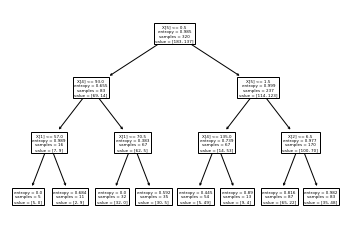

In [18]:
# PLot the decision tree
tree.plot_tree(model_1);

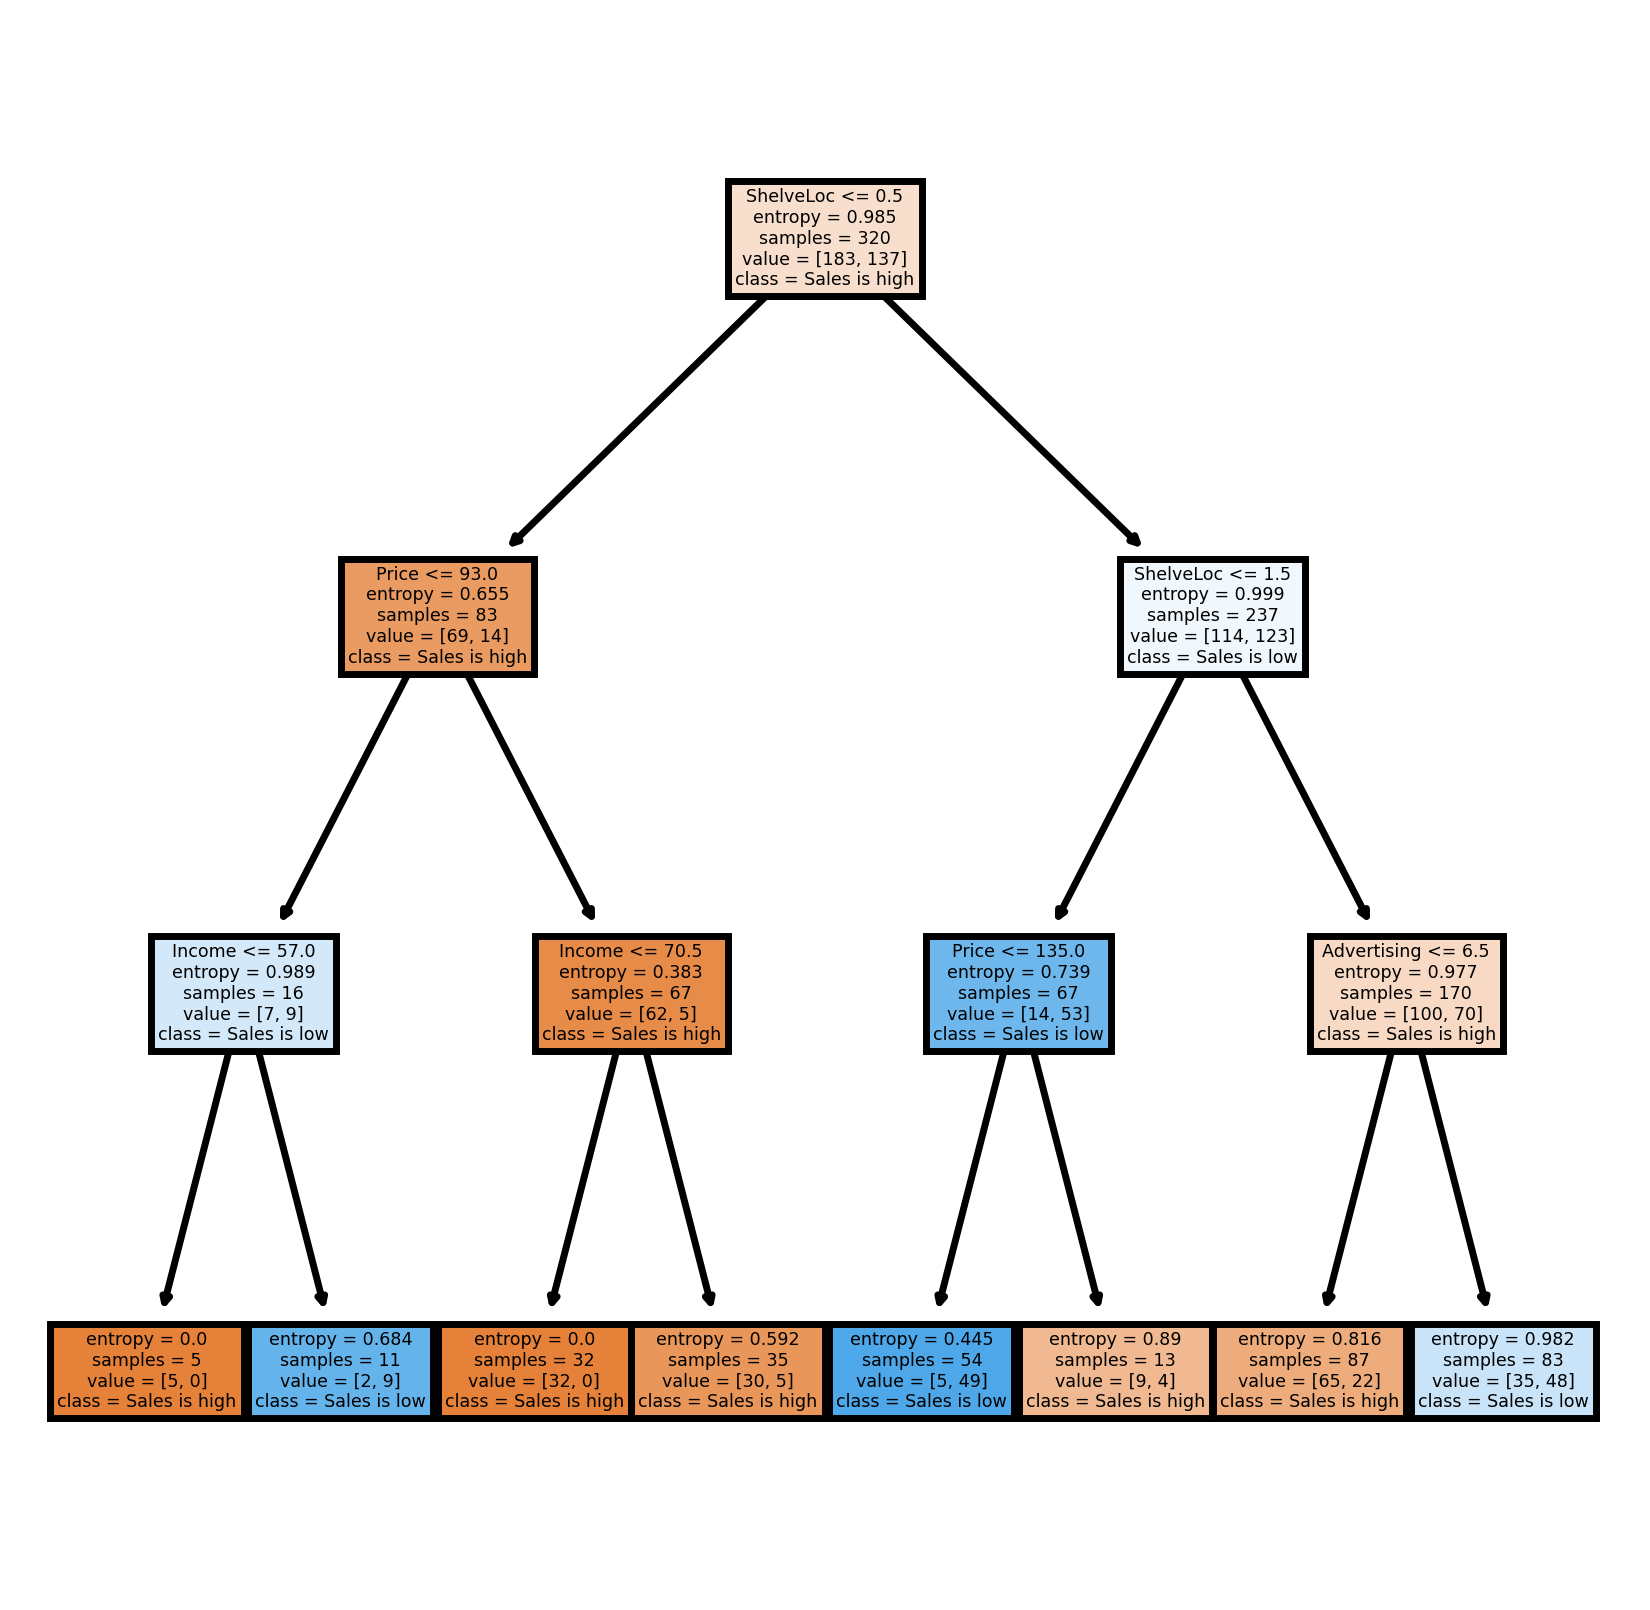

In [19]:
fn = ['CompPrice','Income','Advertising','Population','Price','ShelveLoc','Age','Education','Urban','US']  # we will extract the feature
cn = ['Sales is high', 'Sales is low']
fig,axes = plt.subplots(nrows=1, ncols=1, figsize= (4,4), dpi= 500)
tree.plot_tree(model_1,
             feature_names=fn,
             class_names= cn,
              filled = True);

In [20]:
#Predicting on test data
preds_1 = model_1.predict(x_test) 
preds_1

array([0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0], dtype=int64)

In [21]:
pd.Series(preds_1).value_counts() 
# getting the count of each category 

0    49
1    31
dtype: int64

In [22]:
preds_1

array([0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0], dtype=int64)

In [23]:
pd.crosstab(y_test,preds_1) 
# getting the 2 way table to understand the correct and wrong predictions

col_0,0,1
High,,
0,39,14
1,10,17


In [24]:
print(classification_report(preds_1, y_test))

              precision    recall  f1-score   support

           0       0.74      0.80      0.76        49
           1       0.63      0.55      0.59        31

    accuracy                           0.70        80
   macro avg       0.68      0.67      0.68        80
weighted avg       0.69      0.70      0.70        80



In [25]:
# Accuracy 
np.mean(preds_1==y_test)*100

70.0

In [26]:
print("Accuracy using C5.0 is: ",accuracy_score(preds_1,y_test)*100)

Accuracy using C5.0 is:  70.0


### 2.Building Decision Tree Classifier (CART) -- using Gini Criteria

In [27]:
model_gini = DecisionTreeClassifier(criterion='gini', max_depth=3)
model_gini.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=3)

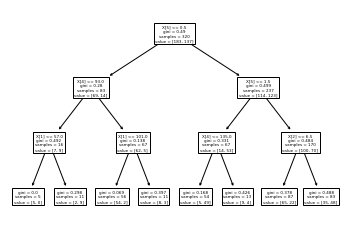

In [28]:
# plot the Decision tree
tree.plot_tree(model_gini);

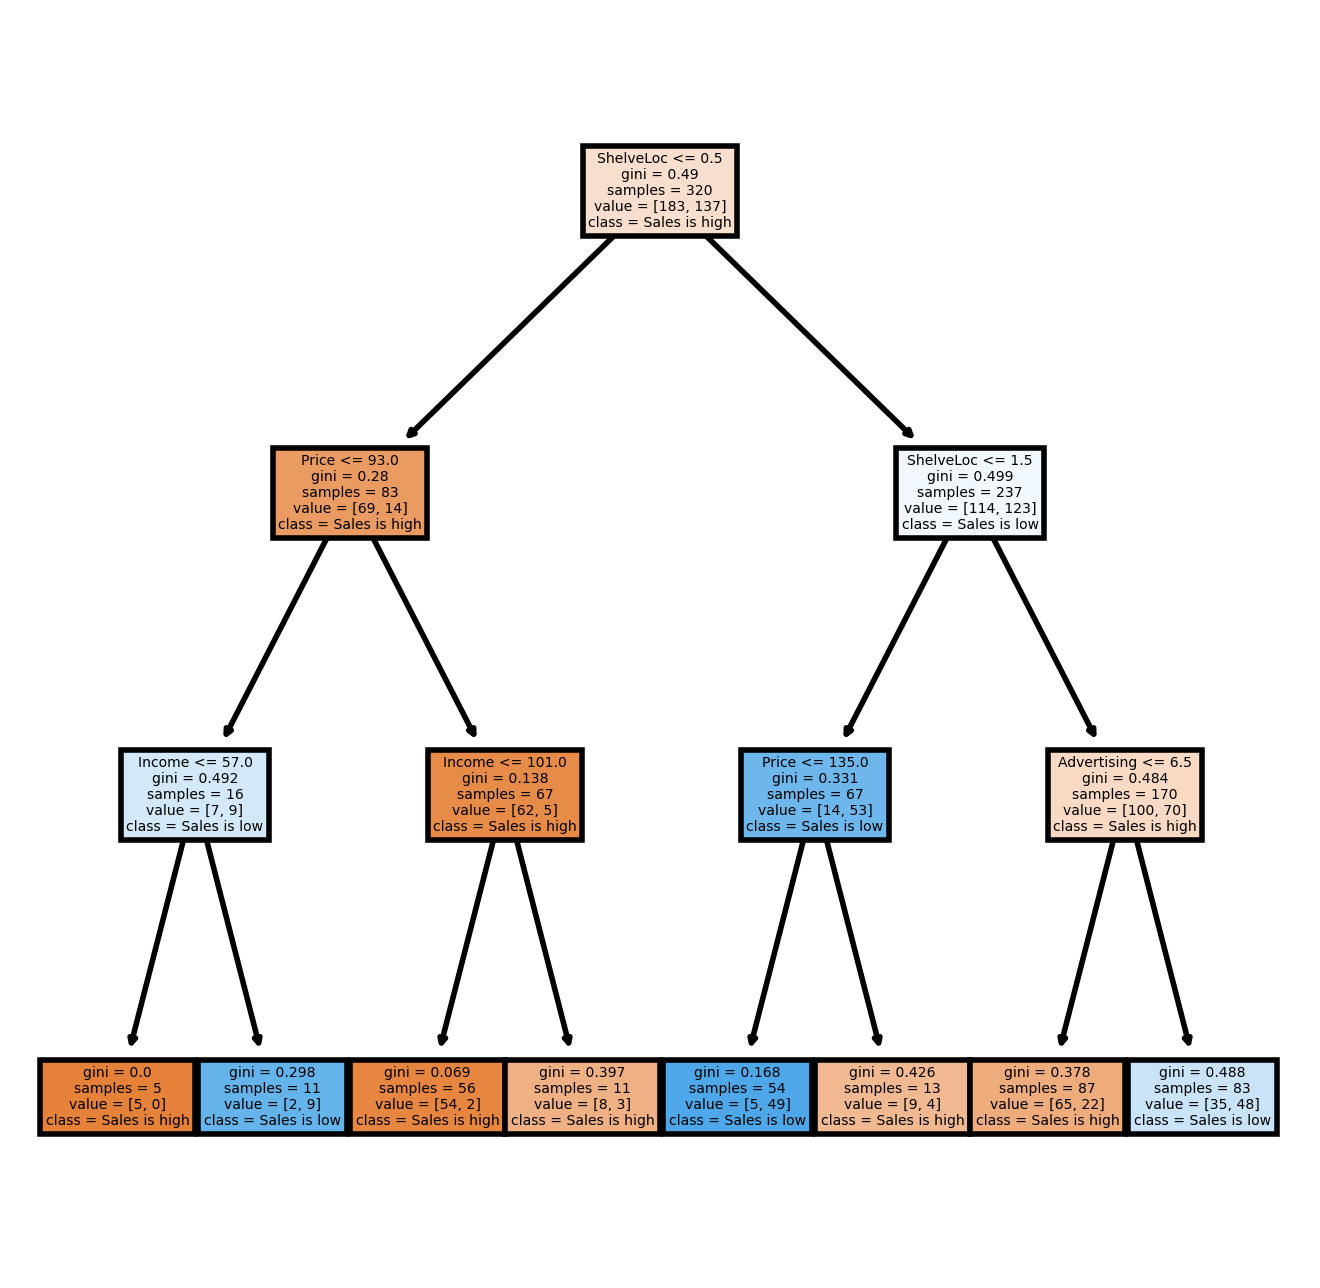

In [29]:
fn = ['CompPrice','Income','Advertising','Population','Price','ShelveLoc','Age','Education','Urban','US'] 
# extracting the feature
cn = ['Sales is high', 'Sales is low']
fig,axes = plt.subplots(nrows=1,ncols= 1, figsize = (4,4), dpi= 400)
tree.plot_tree(model_gini,
               feature_names= fn,
               class_names=cn,
               filled = True);

In [30]:
#predicting on data set
y_preds_2 = model_gini.predict(x_test)
y_preds_2

array([0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0], dtype=int64)

In [31]:
pd.Series(y_preds_2).value_counts()

0    49
1    31
dtype: int64

In [32]:
np.mean(y_preds_2==y_test)

0.7

In [33]:
print("Accuracy CART: " ,accuracy_score (y_test,y_preds_2)*100)

Accuracy CART:  70.0


### Model by--  Bagging

In [34]:
dc_model = BaggingClassifier(DecisionTreeClassifier(max_depth=4), random_state = 0) 
# Decision Tree classifier object (Bagging)
dc_model.fit(x_train, y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(max_depth=4),
                  random_state=0)

In [35]:
y_preds_3 = dc_model.predict(x_test)
y_preds_3

array([0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1,
       0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [36]:
np.mean(y_preds_3==y_test)*100

77.5

In [37]:
print("Accuracy Bagging Classifier: ", accuracy_score(y_test,y_preds_3)*100 )

Accuracy Bagging Classifier:  77.5


In [38]:
print(confusion_matrix(y_test,y_preds_3))
print(classification_report(y_test,y_preds_3))

[[43 10]
 [ 8 19]]
              precision    recall  f1-score   support

           0       0.84      0.81      0.83        53
           1       0.66      0.70      0.68        27

    accuracy                           0.78        80
   macro avg       0.75      0.76      0.75        80
weighted avg       0.78      0.78      0.78        80



### Model by-- Boosting

In [39]:
dcmodel_4 = AdaBoostClassifier(DecisionTreeClassifier(max_depth=4), random_state=0)
# Decision tree classifier object
dcmodel_4.fit(x_train,y_train)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=4),
                   random_state=0)

In [40]:
y_preds_4 = dcmodel_4.predict(x_test)
y_preds_4

array([0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1,
       1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [41]:
np.mean(y_preds_4==y_test)

0.775

In [42]:
print("Accuracy by AdaBoost Classifier: ", accuracy_score(y_preds_4,y_test)*100)

Accuracy by AdaBoost Classifier:  77.5


In [43]:
print(confusion_matrix(y_test, y_preds_4))
print(classification_report(y_test,y_preds_4))

[[46  7]
 [11 16]]
              precision    recall  f1-score   support

           0       0.81      0.87      0.84        53
           1       0.70      0.59      0.64        27

    accuracy                           0.78        80
   macro avg       0.75      0.73      0.74        80
weighted avg       0.77      0.78      0.77        80



###  Model by using -- Random Forest

In [44]:
rf = RandomForestClassifier(n_jobs = 3,oob_score = True,n_estimators = 15,criterion ="entropy")

In [45]:
num_trees= 100
max_features= 3
kfold= KFold(n_splits=10)

In [46]:
model_5 = RandomForestClassifier(n_estimators= num_trees, max_features= max_features)
model_5.fit(x_train, y_train)

RandomForestClassifier(max_features=3)

In [47]:
results = cross_val_score(model_5, x, y, cv= kfold)
results

array([0.85 , 0.825, 0.8  , 0.8  , 0.8  , 0.925, 0.8  , 0.725, 0.85 ,
       0.825])

In [48]:
print(results.mean()*100)

82.0


In [49]:
y_preds_5 = model_5.predict(x_test)
y_preds_5 [0:40]

array([0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1,
       1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1], dtype=int64)

In [50]:
crosstable = pd.crosstab(y_test, y_preds_5)
crosstable

col_0,0,1
High,,
0,47,6
1,7,20


In [51]:
# Comparing the predicted values with actual values and calculating mean for the matches.
np.mean(y_preds_5 ==y_test)

0.8375

In [52]:
print(classification_report(y_preds_5, y_test))

              precision    recall  f1-score   support

           0       0.89      0.87      0.88        54
           1       0.74      0.77      0.75        26

    accuracy                           0.84        80
   macro avg       0.81      0.82      0.82        80
weighted avg       0.84      0.84      0.84        80



In [53]:
# Fitting RandomForestClassifier model from sklearn.ensemble 
rf.fit(x_train,y_train)
print("no of estimators: ",rf.estimators_) 
 # class labels (output)
print("no of class labels: ",rf.classes_)   
 # Number of levels in class labels
print("no of class labels: ",rf.n_classes_)   
# Number of input features in model 8 here 
print("no of features : ",rf.n_features_)    
# Number of outputs when fit performed
print("no of outputs : ",rf.n_outputs_)      
# Number of correctly predicted rows from the out of bag sample
print("out of bag score : ",np.round(rf.oob_score_*100)) 

no of estimators:  [DecisionTreeClassifier(criterion='entropy', max_features='sqrt',
                       random_state=312027490), DecisionTreeClassifier(criterion='entropy', max_features='sqrt',
                       random_state=1686101602), DecisionTreeClassifier(criterion='entropy', max_features='sqrt',
                       random_state=161757174), DecisionTreeClassifier(criterion='entropy', max_features='sqrt',
                       random_state=1181043068), DecisionTreeClassifier(criterion='entropy', max_features='sqrt',
                       random_state=563352502), DecisionTreeClassifier(criterion='entropy', max_features='sqrt',
                       random_state=135560597), DecisionTreeClassifier(criterion='entropy', max_features='sqrt',
                       random_state=1319955795), DecisionTreeClassifier(criterion='entropy', max_features='sqrt',
                       random_state=1894315157), DecisionTreeClassifier(criterion='entropy', max_features='sqrt',
       

In [54]:
rf.predict(x_test) [0:50]

array([0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0], dtype=int64)

In [55]:
y_preds_5 =rf.predict(x_test)
pd.Series(y_preds_5).value_counts()

0    53
1    27
dtype: int64

In [56]:
y_preds_5 [0:40]

array([0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1], dtype=int64)

In [57]:
crosstable = pd.crosstab(y_test,y_preds_5)
crosstable

col_0,0,1
High,,
0,45,8
1,8,19


In [58]:
print(classification_report(y_preds_5, y_test))

              precision    recall  f1-score   support

           0       0.85      0.85      0.85        53
           1       0.70      0.70      0.70        27

    accuracy                           0.80        80
   macro avg       0.78      0.78      0.78        80
weighted avg       0.80      0.80      0.80        80



In [59]:
print("Accuracy by C5.0 : ", accuracy_score(y_test,preds_1)*100)
print("Accuracy by CART : ", accuracy_score(y_test,y_preds_2)*100)
print("Accuracy by Bagging Classifier : ", accuracy_score(y_test,y_preds_3)*100 )
print("Accuracy by AdaBoost Classifier: ", accuracy_score(y_test,y_preds_4)*100 )
print("Accuracy by Random Forest : ", np.round(accuracy_score(y_test,y_preds_5)*100))

Accuracy by C5.0 :  70.0
Accuracy by CART :  70.0
Accuracy by Bagging Classifier :  77.5
Accuracy by AdaBoost Classifier:  77.5
Accuracy by Random Forest :  80.0
